In [47]:
import pyprob
%matplotlib inline
import matplotlib.pyplot as plt
from pyprob import Model
import numpy as np

import math
import pyprob
from pyprob import Model
from pyprob.distributions import Normal, Uniform, Categorical
import torch


In [65]:
class MarkovChainPath(Model):
    def __init__(self):
        super().__init__(name="Gaussian with unknown mean") # give the model a name

    def forward(self): # Needed to specifcy how the generative model is run forward
        # sample the (latent) mean variable to be inferred:
        coords = [[0,0]]
        moves = {0: -1, 1: 0, 2: 1}
        for i in range(1,10):
            last = coords[-1][1]
            move = pyprob.sample(Categorical([1/3.,1/3.,1/3.]), name = 'input{}'.format(i))
            move = moves[move.item()]
            coords.append([i,last+move])

        obs_distr = Normal(coords[-1][1], 0.1)
        pyprob.observe(obs_distr, name='obs0') # NOTE: observe -> denotes observable variables
        return coords

model = MarkovChainPath()

In [66]:
model.learn_inference_network(
    num_traces=10000,
    observe_embeddings={'obs0': {'dim': 32, 'depth': 3}}
)

Creating new inference network...
Observable obs0: observe embedding not specified, using the default FEEDFORWARD.
Observe embedding dimension: 32
Train. time | Epoch| Trace     | Init. loss| Min. loss | Curr. loss| T.since min | Traces/sec
New layers, address: 76__forward__move__Categorical(len_probs:3)__1, distribution: Categorical
New layers, address: 76__forward__move__Categorical(len_probs:3)__2, distribution: Categorical
New layers, address: 76__forward__move__Categorical(len_probs:3)__3, distribution: Categorical
New layers, address: 76__forward__move__Categorical(len_probs:3)__4, distribution: Categorical
New layers, address: 76__forward__move__Categorical(len_probs:3)__5, distribution: Categorical
New layers, address: 76__forward__move__Categorical(len_probs:3)__6, distribution: Categorical
New layers, address: 76__forward__move__Categorical(len_probs:3)__7, distribution: Categorical
New layers, address: 76__forward__move__Categorical(len_probs:3)__8, distribution: Categorical

In [67]:
prior = model.prior_distribution(
    num_traces=2000,
)

Time spent  | Time remain.| Progress             | Trace     | Traces/sec
0d:00:00:02 | 0d:00:00:00 | #################### | 2000/2000 | 691.24       


In [74]:
condition = {'obs0': 7}
posterior = model.posterior_distribution(
    num_traces=2000,
    inference_engine=pyprob.InferenceEngine.IMPORTANCE_SAMPLING_WITH_INFERENCE_NETWORK,
    observe=condition
)

Time spent  | Time remain.| Progress             | Trace     | Traces/sec
0d:00:00:10 | 0d:00:00:00 | #################### | 2000/2000 | 185.68       


In [75]:
post_paths = [posterior.sample() for i in range(20)]

prior_paths = [prior.sample() for i in range(20)]

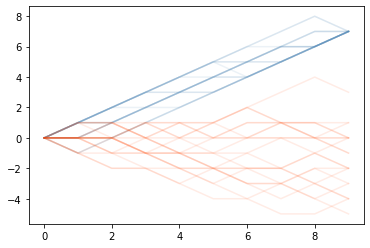

In [76]:
for p in post_paths:
    p = np.asarray(p)
    plt.plot(p[:,0],p[:,1], c = 'steelblue', alpha = 0.1)
    
for p in prior_paths:
    p = np.asarray(p)
    plt.plot(p[:,0],p[:,1], c = 'orangered', alpha = 0.1)    